<a href="https://colab.research.google.com/github/PuiPu/data_sci_final_project/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 匯入 github

In [1]:
# 使用個人訪問令牌克隆私有存儲庫
!git clone https://github.com/PuiPu/data_sci_final_project.git

Cloning into 'data_sci_final_project'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 42 (delta 15), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (42/42), 929.76 KiB | 3.99 MiB/s, done.
Resolving deltas: 100% (15/15), done.


# ARIMA (Gemini)

In [31]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# 讀取克隆的存儲庫中的 .csv 文件
df = pd.read_csv('/content/data_sci_final_project/aapl_us_d.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df = df.fillna(df.mean()) # 填補缺失值

In [32]:
# 推斷頻率
freq = pd.infer_freq(df.index)

# 使用推斷的頻率創建日期索引
df.index = pd.date_range(start=df.index[0], periods=len(df), freq=freq)

In [35]:
print(df.index.freq)

<Day>


In [33]:
from datetime import datetime
# Split the data into training and testing sets
train_end = datetime(2017, 11, 6)
test_start = datetime(2017, 11, 7)
train_data = df[:train_end]
test_data = df[test_start:] # 先用到2023，照理講應該要到2024(總共14年)

In [37]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.7 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
model = auto_arima(df['Close'], seasonal=True, m=12)  # 根據數據選擇正確的季節性頻率 m
print(model.order)  # 獲取最佳 (p, d, q)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

In [34]:
# 建立模型並預測
model = ARIMA(train_data['Close'], order=(2, 1, 6))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)

print(forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2012-04-13    220.937877
2012-04-14    220.820036
2012-04-15    220.933024
2012-04-16    220.889257
2012-04-17    220.854843
2012-04-18    220.948172
2012-04-19    220.808582
2012-04-20    220.976530
2012-04-21    220.801094
2012-04-22    220.962761
Freq: D, Name: predicted_mean, dtype: float64


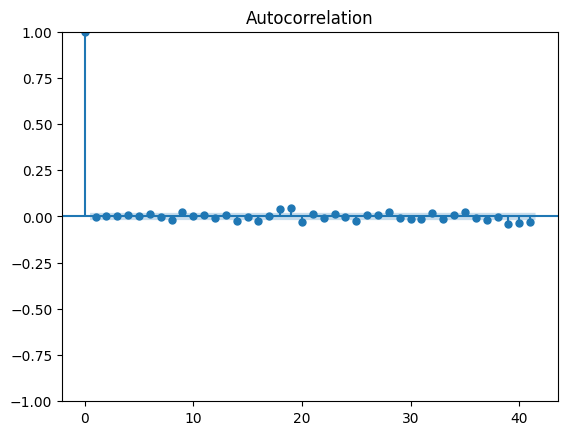

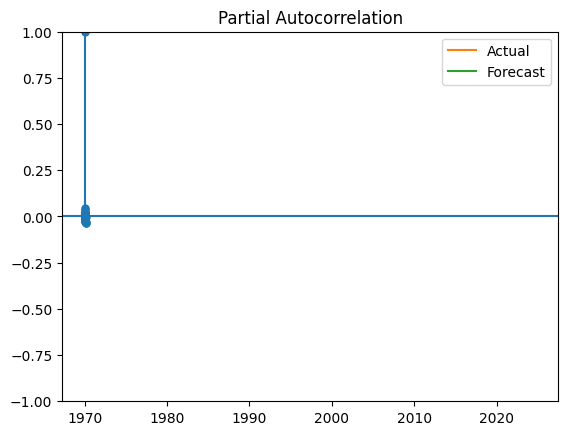

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 檢查模型殘差的 ACF 和 PACF
residuals = model_fit.resid
plot_acf(residuals)
plot_pacf(residuals)

# 繪製模型預測值和實際值的圖表
plt.plot(test_data.index, test_data['Close'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast')
plt.legend()
plt.show()

# 畫出趨勢線

10080


IndexError: index -1 is out of bounds for axis 0 with size 0

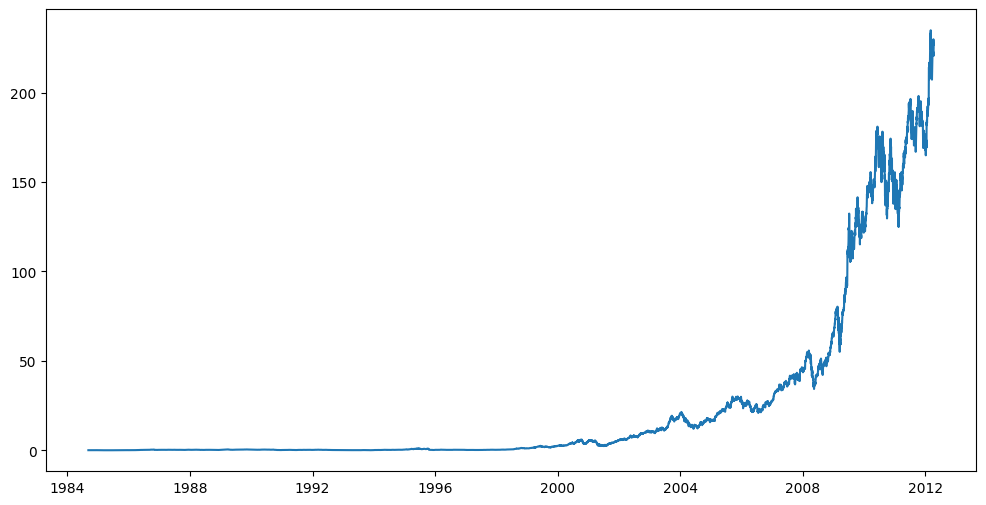

In [26]:
import matplotlib.pyplot as plt

print(len(train_data))

# 繪製圖表
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Test Data')

forecast_index = pd.date_range(start=test_data.index[-1], periods=len(forecast), freq='D')
plt.plot(forecast_index, forecast, label='Forecast', color='red')

plt.title('Apple Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()